## import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [3]:
from google.colab import drive

In [5]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [7]:
data = pd.read_csv('emotions.csv')

In [8]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [9]:
data['label'].value_counts()

,count
label,
NEUTRAL,716
NEGATIVE,708
POSITIVE,708


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [13]:
label_maping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [14]:
data['label'] = data['label'].replace(label_maping)

/tmp/ipython-input-2558762912.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace(label_maping)


In [15]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [21]:
X = data.drop('label', axis=1)
y = data['label']

In [22]:
x.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [23]:
y.head()

,label
0,0
1,1
2,2
3,2
4,1


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
print('Shape X_Train:', X_train.shape)
print('Shape y_Train:', y_train.shape)
print('Shape X_Test:', X_test.shape)
print('Shape y_Test:', y_test.shape)

Shape X_Train: (1492, 2548)
Shape y_Train: (1492,)
Shape X_Test: (640, 2548)
Shape y_Test: (640,)


Define Model: ANN

In [44]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [49]:
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_shape=(2548,)))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model_ann.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       163,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,315 (645.76 KB)

 Trainable params: 165,315 (645.76 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model



In [51]:
model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the Model

In [52]:
model_ann.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4513 - loss: 310498419539968.0000 - val_accuracy: 0.6422 - val_loss: 80592796385280.0000
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 2755413409792.0000 - val_accuracy: 0.5453 - val_loss: 58644926300160.0000
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5642 - loss: 2382237794304.0000 - val_accuracy: 0.5406 - val_loss: 58818314633216.0000
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 14306122924032.0000 - val_accuracy: 0.5078 - val_loss: 80210435244032.0000
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5177 - loss: 5429758263296.0000 - val_accuracy: 0.5453 - val_loss: 43121547149312.0000
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5312 - loss: 7560408072192.0000 - val_accuracy: 0.5453 - val_loss: 19471936782336.0000
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5331 - loss: 297323

Prediction

In [58]:
y_pred_proba = model_ann.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [59]:
y_pred_proba[10]

array([0., 0., 1.], dtype=float32)

In [60]:
predict_labels = np.argmax(y_pred_proba, axis=1)

In [61]:
y_pred = predict_labels

In [62]:
y_pred[10]

np.int64(2)

Results

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
print(confusion_matrix(y_test, y_pred))

[[204   2   0]
 [  5   8 206]
 [ 69   2 144]]


In [65]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

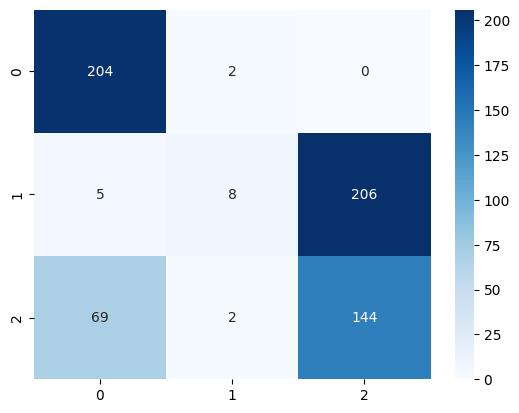

In [66]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       206
           1       0.67      0.04      0.07       219
           2       0.41      0.67      0.51       215

    accuracy                           0.56       640
   macro avg       0.60      0.57      0.47       640
weighted avg       0.60      0.56      0.47       640

